# Bit Commitment for trusting parties
Bit Commitment (BC) is a cryptographic primitive that captures the following two-party functionality: Alice has a bit b that she wants to commit to Bob, but she wants to prevent Bob from reading b until she chooses to reveal it (concealing or hiding). Although Bob should not be able to determine b before Alice reveals it, Alice should be unable to change the bit after it is committed (binding). A physical-world implementation of bit commitment would be for Alice to write b on a piece of paper, lock it in a safe, and send the safe to Bob. Since Bob cannot open the safe, he cannot determine b (concealing), and since Alice has physically given the safe to Bob, she cannot change b after the commitment phase (binding). When Alice wishes to reveal the bit, she sends the key to Bob.

## Importing libraries

In [30]:
%matplotlib inline
# Importing standard Qiskit libraries
import qiskit
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from random import randint
import hashlib

## Funtions to convert strings to and from binary

In [5]:
def tobits(s):
    result = []
    for c in s:
        bits = bin(ord(c))[2:]
        bits = '00000000'[len(bits):] + bits
        result.extend([int(b) for b in bits])
    return ''.join([str(x) for x in result])

In [ ]:
def frombits(bits):
    chars = []
    for b in range(int(len(bits) / 8)):
        byte = bits[b*8:(b+1)*8]
        chars.append(chr(int(''.join([str(bit) for bit in byte]), 2)))
    return ''.join(chars)

## Sender side (Alice)

In the next few cells, Alice chooses the messages She wants to send to Bob then She encrypts message and sends it to Bob. The encryption works as follows: For each bit in the bit String, She choses a random number in the set {0,1}. If the number is 1, She encrypts the choosen bit and She leaves the bit without encryption otherwise. Notice that it would be impossible for Bob to know which bits were encrypted and which weren't.

In [55]:
# Converting the string into binary
messageToSend = tobits(input("Enter a message to encrypt:"))
messageToSend

Enter a message to encrypt how are you?


'011010000110111101110111001000000110000101110010011001010010000001111001011011110111010100111111'

In [56]:
# An array for random 1s/0s of the same length as the message
Alice_bases = [randint(0,1) for x in range(len(messageToSend))]

In [57]:
# Creating a quantum circuit
qubits = list()
for i in range(len(Alice_bases)):
    mycircuit = QuantumCircuit(1,1)
    if(Alice_bases[i] == 0):
        if(messageToSend[i] == "1"):
            mycircuit.x(0)
    else:
        if(messageToSend[i] == "0"):
            mycircuit.h(0)
        else:
            mycircuit.x(0)
            mycircuit.h(0)
    qubits.append(mycircuit)

## Receiver's Side (Bob)

In [59]:
backend = Aer.get_backend('qasm_simulator')
measurements = list()
for i in range(len(Alice_bases)):
    qubit = qubits[i]
    if(Alice_bases[i] == 0):
        qubit.measure(0,0)
    else:
        qubit.h(0)
        qubit.measure(0,0)
    result = execute(qubit, backend, shots=1, memory=True).result()
    measurements.append(int(result.get_memory()[0]))
print("Alice message was: " + frombits(measurements))

Alice message was: how are you?


## Quantum Circuit Diagrams

First bit on Alice's side: 0
Corresponding base bit: 1
Resultant bit on Bob's side: 0


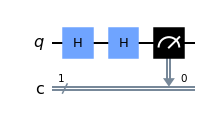

In [63]:
print("First bit on Alice's side:", messageToSend[0])
print("Corresponding base bit:", Alice_bases[0])
print("Resultant bit on Bob's side:", measurements[0])

qubits[0].draw()

Second bit on Alice's side: 1
Corresponding base bit: 1
Resultant bit on Bob's side: 1


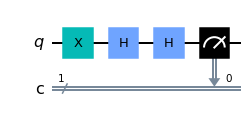

In [65]:
print("Second bit on Alice's side:", messageToSend[1])
print("Corresponding base bit:", Alice_bases[1])
print("Resultant bit on Bob's side:", measurements[1])

qubits[1].draw()

Third bit on Alice's side: 1
Corresponding base bit: 0
Resultant bit on Bob's side: 1


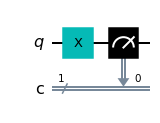

In [66]:
print("Third bit on Alice's side:", messageToSend[2])
print("Corresponding base bit:", Alice_bases[2])
print("Resultant bit on Bob's side:", measurements[2])

qubits[2].draw()